https://www.dominodatalab.com/blog/getting-started-with-k-means-clustering-in-python

In [122]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
# import some data to play with
data = pd.read_csv('kmeans.csv', header='infer')
le = preprocessing.LabelEncoder()
le.fit(data['class'])
data['class']=le.transform(data['class'])

#data1 = data.drop(columns=['class', "mfcc_2_mean", "mfcc_3_mean",  "mfcc_4_mean", "mfcc_5_mean", "mfcc_6_mean", "mfcc_7_mean", "mfcc_8_mean","mfcc_9_mean","mfcc_10_mean","mfcc_11_mean","mfcc_12_mean",	"mfcc_13_mean"])
data1 = data.sample(frac=0.05, replace=True, random_state=1)
data = data.sample(frac=0.05, replace=True, random_state=1)

X = data1
y = data['class']
#names = iris.feature_names

In [123]:

#Put data onto the same standard scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(data1)
data1=scaler.fit_transform(data1)
data1

array([[ 0.97472455,  1.27100029,  0.43490039, ...,  0.07560605,
         0.12054557,  1.32961096],
       [-1.1326498 ,  0.38349164,  0.17474482, ..., -2.35149471,
        -2.09086665, -1.82701938],
       [ 1.08799553, -1.07601905, -0.13275129, ...,  0.13947761,
         0.09359311,  0.27740085],
       ...,
       [-0.78231099, -1.0056135 , -1.47920055, ..., -1.42267668,
         0.72575171, -0.77480927],
       [-2.1516173 ,  0.13209536,  2.57461577, ..., -0.29521495,
         0.36256272,  0.27740085],
       [-1.34081075, -0.09606308, -0.45713941, ..., -1.26247672,
        -1.37313695, -1.82701938]])

ValueError: x and y must be the same size

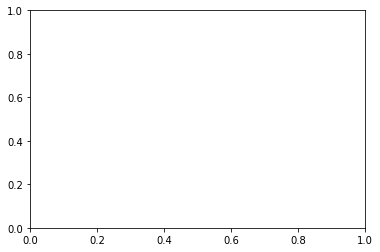

In [124]:
plt.scatter(data1[1:,0],data1[1:,1:])
plt.xlabel('ZCR_MEAN')
plt.ylabel('MFCC_1_MEAN')
plt.show()

In [117]:
kmeans = KMeans(n_clusters=4, random_state=42) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [118]:
kmeans.labels_

array([2, 0, 3, 0, 3, 0, 0, 2, 0, 1, 3, 2, 0, 2, 2, 3, 0, 2, 3, 2, 0, 2,
       0, 0, 3, 0, 2, 3, 1, 0, 2, 2, 0, 3, 2, 3, 1, 1, 2, 1, 2, 2, 2, 1,
       3, 3, 2, 3, 0, 2, 0, 3, 1, 0, 0, 0, 1, 0, 1, 1, 3, 2, 0, 0, 2, 3,
       0, 0, 3, 2, 1, 0, 0, 0, 2, 1, 2, 0, 0, 3, 0, 3, 0, 1, 3, 0, 0, 0,
       0, 3, 1, 3, 0, 0, 2, 2, 0, 1, 2, 3, 1, 0, 2, 3, 3, 0, 3, 0, 2, 2,
       3, 2, 3, 2, 2, 0, 2, 1, 3, 3, 2, 3, 3, 2, 3, 2, 3, 1, 1, 2, 1, 1,
       2, 0, 2, 3, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 0, 3, 0, 0, 2, 2,
       0, 2, 0, 2, 3, 3, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 3, 3,
       1, 1, 3, 3, 1, 2, 2, 0, 2, 3, 0, 1, 3, 2, 3, 3, 0, 3, 0, 0, 3, 2,
       2, 1, 0, 1, 2, 1, 3, 1, 2, 2, 3, 1, 1, 2, 2, 3, 3, 2, 2, 2, 3, 0,
       2, 0, 0, 3, 2, 3, 2, 1, 2, 3, 3, 1, 2, 3, 0, 0, 2, 3, 3, 3, 2, 2,
       2, 0, 0, 3, 1, 1, 3, 2, 1, 3, 0, 3, 0, 2, 2, 3, 0, 2, 2, 3, 3, 0,
       0, 2, 1, 0, 0, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 3,
       2, 0, 0, 2, 0, 2, 3, 3, 0, 2, 2, 0, 2, 3, 3,

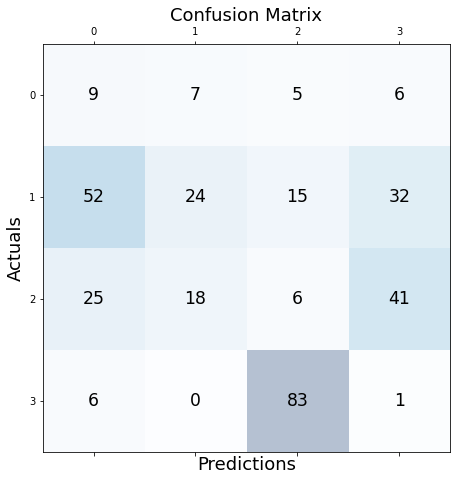

In [119]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, kmeans.labels_) 

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [120]:
kmeans.cluster_centers_


array([[  0.21541499, -24.04067183],
       [  0.22903928, -28.44097162],
       [  0.26110229, -21.9264869 ],
       [  0.22995981, -26.04085793]])

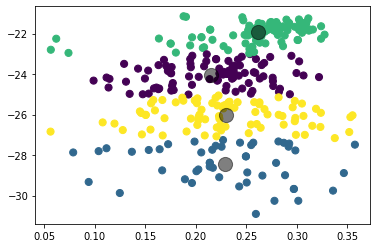

In [121]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

https://notebook.community/ml4a/ml4a-guides/notebooks/audio-tsne

In [125]:
!pip install librosa


In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import fnmatch
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from sklearn.manifold import TSNE
import json
from sklearn.cluster import KMeans


scan some directory of audio files and collect all their paths into a single list

In [18]:
path = 'D:\\PhD\\data\\test-audio'

files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d .wav files in %s"%(len(files),path))

found 6604 .wav files in D:\PhD\data\test-audio


function which extracts a feature vector from an audio file

The feature extraction will calculate the first 13 mel-frequency cepstral coefficients of the audio file, as well as their first- and second-order derivatives, and concatenate them into a single 39-element feature vector. The feature vector is also standardized so that each feature has equal variance.

In [19]:
def get_features(y, sr):
    y = y[0:sr]  # analyze just first second
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.amplitude_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
    delta_mfcc = librosa.feature.delta(mfcc, mode='nearest')
    delta2_mfcc = librosa.feature.delta(mfcc, order=2, mode='nearest')
    feature_vector = np.concatenate((np.mean(mfcc,1), np.mean(delta_mfcc,1), np.mean(delta2_mfcc,1)))
    feature_vector = (feature_vector-np.mean(feature_vector)) / np.std(feature_vector)
    return feature_vector

Now we will iterate through all the files, and get their feature vectors, placing them into a new list feature_vectors. We also make a new array sound_paths to index the feature vectors to the correct paths

In [20]:
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    if i % 100 == 0:
        print("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f)
        if len(y) < 2:
            print("error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except:
        print("error loading %s" % f)
        
print("calculated %d feature vectors"%len(feature_vectors))

get 1 of 6604 = D:\PhD\data\test-audio\anthrophony\chunkaudio_segment_30.wav0.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00158691  0.0038147   0.00732422 ... -0.00939941 -0.00640869
 -0.00552368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[0.00598145 0.00750732 0.01095581 ... 0.00402832 0.00640869 0.00534058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[0.00250244 0.00268555 0.00146484 ... 0.00177002 0.00097656 0.00216675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipyk

get 101 of 6604 = D:\PhD\data\test-audio\anthrophony\chunkaudio_segment_dryB1.wav10.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00445557 -0.0015564   0.00317383 ... -0.01977539 -0.02972412
 -0.01669312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00692749 -0.00473022 -0.00219727 ...  0.00540161  0.00418091
 -0.00567627] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.01351929  0.01235962  0.04418945 ...  0.00854492  0.02639771
  0.02050781] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 201 of 6604 = D:\PhD\data\test-audio\anthrophony\chunkaudio_segment_dryB16.wav12.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00039673 -0.00045776 -0.00158691 ...  0.00140381  0.00177002
  0.00231934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00366211  0.0045166   0.00402832 ... -0.00192261 -0.00054932
  0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00302124  0.00100708 -0.00234985 ...  0.00143433 -0.00042725
 -0.00274658] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 301 of 6604 = D:\PhD\data\test-audio\anthrophony\chunkaudio_segment_dryB22.wav2.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00317383 -0.00256348 -0.00112915 ... -0.006073   -0.0012207
  0.00296021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00439453 -0.00366211 -0.00335693 ...  0.02059937  0.02401733
  0.02584839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00610352  0.00305176  0.00747681 ... -0.01419067 -0.0171814
 -0.01776123] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Loc

get 401 of 6604 = D:\PhD\data\test-audio\anthrophony\chunkaudio_segment_dryB29.wav4.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00213623 -0.00064087  0.00079346 ...  0.04562378  0.04693604
  0.05783081] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.01043701  0.00247192  0.01373291 ... -0.01818848 -0.01184082
 -0.00665283] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00784302 -0.00558472 -0.0043335  ... -0.02630615 -0.02774048
 -0.02670288] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 501 of 6604 = D:\PhD\data\test-audio\anthrophony\chunkaudio_segment_dryB7.wav6.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00411987  0.00042725  0.00115967 ...  0.01422119  0.0078125
 -0.00091553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00140381  0.00131226  0.00161743 ... -0.00085449 -0.00061035
 -0.00061035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.0022583   0.00100708  0.00341797 ... -0.00112915 -0.00302124
 -0.00247192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 601 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_101.wav8.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00177002 -0.00311279 -0.00549316 ... -0.00390625 -0.00375366
 -0.00512695] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00036621 -0.00170898 -0.00216675 ...  0.00228882  0.00296021
  0.00119019] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00036621 -0.00210571 -0.00466919 ...  0.00210571  0.00308228
  0.00183105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 701 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_109.wav0.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00164795  0.00054932 -0.00137329 ... -0.00314331 -0.00515747
 -0.00204468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00985718  0.01348877  0.01177979 ... -0.01049805 -0.00378418
  0.00582886] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00115967 -0.00213623 -0.00201416 ... -0.00650024 -0.00524902
 -0.0022583 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 801 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_115.wav10.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[0.02792358 0.04272461 0.05151367 ... 0.00878906 0.01062012 0.01098633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00268555 -0.00115967 -0.00067139 ...  0.00018311 -0.00079346
 -0.00100708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00125122  0.00198364 -0.00021362 ...  0.00128174  0.00292969
  0.00195312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Te

get 901 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_14.wav13.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.02700806  0.04031372  0.03790283 ... -0.0098877   0.00341797
  0.01068115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00436401 -0.00637817 -0.00524902 ... -0.00234985  0.00286865
  0.0083313 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00222778  0.0038147  -0.00048828 ... -0.00793457 -0.00195312
  0.00799561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 1001 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_20.wav3.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.0015564   0.00021362  0.00140381 ...  0.00326538  0.00357056
  0.00228882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00146484 -0.0022583  -0.00036621 ...  0.00131226 -0.00186157
 -0.00134277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 2.6550293e-03 -2.7465820e-04  3.3569336e-04 ... -4.2724609e-04
  1.0986328e-03  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 1101 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_27.wav5.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-8.5449219e-04 -3.6621094e-04 -1.4648438e-03 ...  1.2512207e-03
  6.1035156e-05 -9.4604492e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.003479   -0.00488281 -0.00390625 ... -0.003479   -0.00439453
 -0.00665283] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[0.00256348 0.00219727 0.00073242 ... 0.00054932 0.00024414 0.00100708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thoma

get 1201 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_33.wav7.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.0020752  -0.00210571 -0.00186157 ...  0.00036621 -0.00024414
 -0.00198364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00012207 -0.00015259  0.00137329 ...  0.0010376   0.0032959
 -0.00302124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00421143 -0.00445557 -0.00283813 ...  0.00177002 -0.00082397
 -0.00265503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 1301 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_4.wav9.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.0015564  -0.00219727  0.00402832 ... -0.00161743 -0.00415039
 -0.00585938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00036621 -0.00302124 -0.00454712 ... -0.01156616 -0.00680542
 -0.00094604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00686646  0.00158691 -0.0078125  ... -0.01263428 -0.0032959
  0.00802612] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 1401 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_47.wav1.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00091553  0.00048828 -0.00289917 ... -0.00253296 -0.00079346
  0.00234985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00219727  0.00350952  0.00473022 ... -0.0043335  -0.0038147
 -0.00631714] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 8.8500977e-04  2.7465820e-04  3.0517578e-05 ... -1.6784668e-03
  3.6621094e-04  2.1057129e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users

get 1501 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_53.wav11.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00308228 -0.00189209 -0.0032959  ... -0.00085449 -0.00018311
 -0.00210571] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[0.00341797 0.0083313  0.00592041 ... 0.00991821 0.00613403 0.00140381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00790405 -0.01370239 -0.01358032 ... -0.02984619 -0.02252197
 -0.01113892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Te

get 1601 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_6.wav13.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00332642  0.00326538 -0.00180054 ...  0.00680542 -0.0043335
 -0.01266479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.02386475 -0.03421021 -0.01016235 ... -0.01092529 -0.01004028
 -0.00341797] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00170898 -0.01260376 -0.02941895 ... -0.00750732 -0.00643921
 -0.00854492] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 1701 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_66.wav3.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.01275635  0.00393677 -0.01800537 ...  0.0071106  -0.00079346
 -0.00460815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00338745 -0.00360107  0.0161438  ... -0.01025391 -0.00738525
  0.00308228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.01437378  0.00921631  0.03924561 ... -0.03649902 -0.10690308
 -0.13650513] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 1801 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_72.wav5.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00466919 -0.00097656 -0.00317383 ... -0.01107788 -0.00637817
 -0.01068115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[0.00509644 0.02737427 0.0199585  ... 0.04525757 0.03598022 0.02328491] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00369263  0.00140381 -0.00463867 ... -0.00350952 -0.0111084
 -0.01290894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Tem

get 1901 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_79.wav7.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.0017395  -0.00195312 -0.0017395  ... -0.00241089 -0.0012207
 -0.00213623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.01785278  0.01593018 -0.00415039 ... -0.00134277 -0.00253296
 -0.00112915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00082397 -0.00030518 -0.00189209 ...  0.00115967  0.00561523
  0.01049805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 2001 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_85.wav9.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00332642 -0.00125122 -0.00119019 ... -0.00238037  0.00463867
  0.00698853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00915527 -0.00772095 -0.00830078 ...  0.00140381 -0.00018311
  0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.0027771  -0.00588989 -0.00408936 ...  0.00314331  0.00546265
  0.00259399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 2101 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_92.wav1.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 9.1552734e-05 -8.5449219e-04 -1.4343262e-03 ... -3.0822754e-03
  1.7089844e-03  3.9978027e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00439453 -0.00726318 -0.00219727 ...  0.00079346  0.00057983
 -0.0010376 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00067139  0.00115967 -0.00082397 ...  0.00271606  0.00042725
  0.00143433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 2201 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_99.wav11.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00912476  0.00845337  0.00439453 ... -0.00408936 -0.00549316
 -0.00421143] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00344849  0.00314331  0.00299072 ... -0.00192261  0.00149536
  0.00393677] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 1.5258789e-04 -3.3569336e-04  1.8310547e-04 ... -9.1552734e-05
 -2.4108887e-03 -4.7607422e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 2301 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_dryA87.wav13.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.04122925  0.00515747  0.04052734 ... -0.00720215 -0.01373291
 -0.0062561 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.01080322 -0.01416016 -0.0116272  ... -0.02429199 -0.02679443
 -0.019104  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.01376343 -0.00671387  0.00485229 ...  0.01119995  0.006073
 -0.00527954] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Loc

get 2401 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_dryA94.wav3.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00335693 -0.00042725 -0.00448608 ... -0.00030518  0.00546265
  0.01119995] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00146484  0.00500488  0.00390625 ... -0.01293945 -0.00738525
 -0.0007019 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00836182  0.00543213 -0.00164795 ... -0.01809692 -0.01797485
 -0.00579834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 2501 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_wetA1.wav5.wav
error loading D:\PhD\data\test-audio\biophony\chunkaudio_segment_wetA10.wav4.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00247192  0.00509644  0.00543213 ...  0.00064087  0.00045776
 -0.00195312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00463867 -0.00326538 -0.00109863 ... -0.00012207  0.00378418
  0.00314331] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00357056 -0.00183105  0.00271606 ...  0.00527954  0.00320435
  0.00204468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 2601 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_wetA16.wav7.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00488281  0.00332642  0.00283813 ...  0.00415039  0.00186157
 -0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00085449 -0.00210571  0.0017395  ...  0.00054932  0.00064087
  0.00210571] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00256348 -0.00552368 -0.00259399 ... -0.00057983 -0.00216675
  0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 2701 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_wetA22.wav9.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 6.1035156e-05  7.4462891e-03  6.9580078e-03 ...  1.2817383e-03
 -4.3945312e-03 -7.9650879e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00115967  0.00149536  0.00091553 ...  0.00131226 -0.00274658
  0.00091553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.0005188  -0.00210571  0.00256348 ...  0.00567627  0.01184082
  0.00817871] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 2801 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_wetA3.wav1.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00161743  0.00195312  0.0012207  ...  0.00427246 -0.00015259
  0.00259399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00143433  0.00274658  0.00765991 ... -0.0045166  -0.00619507
 -0.00268555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00366211 -0.00134277  0.00054932 ...  0.00213623  0.01199341
  0.01901245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 2901 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_wetA9.wav11.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00283813  0.00231934  0.00234985 ... -0.00195312 -0.0043335
 -0.00320435] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[0.00238037 0.00238037 0.00073242 ... 0.0027771  0.00195312 0.00140381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00085449  0.00057983 -0.00286865 ...  0.00494385  0.00302124
  0.00131226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Tem

get 3001 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_108.wav13.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.01205444 -0.01202393 -0.01043701 ... -0.00085449  0.00112915
 -0.00054932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00689697 -0.00982666 -0.0100708  ...  0.00521851  0.00531006
  0.00314331] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00073242 -0.00219727  0.00073242 ... -0.00784302 -0.01074219
 -0.00820923] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 3101 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_115.wav3.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00283813  0.00354004  0.00436401 ... -0.00192261 -0.00167847
 -0.00091553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00875854  0.00927734  0.00714111 ... -0.00216675 -0.00064087
 -0.00192261] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00283813 -0.00372314  0.00030518 ...  0.00253296  0.00430298
  0.00543213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 3201 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_62.wav6.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00338745 -0.0322876   0.08581543 ... -0.00534058 -0.00894165
 -0.01733398] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00064087 -0.00561523 -0.02200317 ... -0.00665283  0.01254272
  0.0032959 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00750732  0.01101685  0.00912476 ... -0.00219727 -0.01663208
  0.02609253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 3301 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB100.wav8.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-5.9814453e-03 -6.1035156e-05 -6.0729980e-03 ... -3.6010742e-03
  1.8310547e-04  4.9133301e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00949097 -0.01287842 -0.00350952 ... -0.00170898 -0.00531006
 -0.00488281] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00561523 -0.00543213 -0.00283813 ...  0.0012207   0.00143433
 -0.00253296] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 3401 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB108.wav0.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00366211  0.00042725 -0.00796509 ...  0.01275635  0.01867676
  0.01550293] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.03125    -0.0335083  -0.04098511 ...  0.0116272   0.00482178
  0.00488281] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.05267334  0.05529785  0.04998779 ... -0.03662109 -0.03295898
 -0.02981567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 3501 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB114.wav10.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00601196  0.01028442  0.02246094 ... -0.04754639 -0.05554199
 -0.05407715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00167847 -0.00326538  0.00143433 ...  0.00152588  0.00588989
 -0.00482178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.03933716 -0.04052734 -0.04190063 ... -0.00894165 -0.00189209
  0.00836182] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 3601 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB13.wav13.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00738525  0.00109863  0.00454712 ... -0.00201416 -0.01525879
 -0.0050354 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00134277  0.00079346 -0.00439453 ... -0.00140381  0.00048828
  0.00582886] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.0032959  -0.01055908 -0.00515747 ...  0.00341797  0.00476074
  0.00299072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 3701 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB2.wav3.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00735474  0.00473022  0.0038147  ...  0.00152588 -0.00054932
 -0.0085144 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00167847 -0.00531006 -0.00930786 ... -0.00091553 -0.00158691
 -0.00527954] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00506592 -0.0062561   0.00158691 ... -0.00997925 -0.00772095
 -0.00491333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 3801 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB26.wav5.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00613403 -0.00317383 -0.00360107 ... -0.00387573  0.00115967
  0.00476074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00537109  0.00238037 -0.00079346 ... -0.00265503  0.00308228
  0.00265503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.02416992 -0.02670288 -0.02230835 ...  0.00527954  0.00842285
  0.00469971] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 3901 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB32.wav7.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[0.00915527 0.01773071 0.01312256 ... 0.00363159 0.00421143 0.00610352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00411987  0.00109863 -0.00250244 ... -0.00643921  0.00079346
  0.00119019] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00119019  0.003479    0.00326538 ... -0.00906372 -0.01809692
 -0.00054932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Te

get 4001 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB39.wav9.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.0038147  -0.00582886 -0.00338745 ... -0.01705933 -0.01443481
 -0.01074219] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00341797 -0.00247192 -0.00631714 ... -0.00875854 -0.00485229
  0.00317383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.0022583   0.00161743  0.00262451 ... -0.00473022 -0.00582886
 -0.00827026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 4101 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB46.wav1.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00280762 -0.00463867  0.00283813 ... -0.01211548 -0.00701904
 -0.00421143] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00494385 -0.00491333  0.00027466 ...  0.00143433 -0.00097656
  0.00180054] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00653076 -0.00228882  0.00234985 ...  0.00250244 -0.00354004
 -0.00430298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 4201 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB52.wav11.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.02545166  0.01858521  0.0199585  ...  0.00543213  0.0022583
 -0.00952148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-6.4086914e-04  5.5236816e-03  5.8593750e-03 ...  3.0517578e-05
  4.9438477e-03  1.3732910e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00830078 -0.00616455  0.00027466 ... -0.00128174 -0.00204468
  0.00460815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users

get 4301 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB59.wav13.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[0.00888062 0.00875854 0.01281738 ... 0.00149536 0.00494385 0.00402832] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.0057373  -0.00741577 -0.00201416 ... -0.00524902 -0.00396729
 -0.0010376 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00143433  0.00250244  0.00238037 ... -0.00219727  0.00375366
 -0.00323486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Te

get 4401 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB65.wav3.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00308228 -0.00543213 -0.00048828 ... -0.01296997 -0.01269531
 -0.00393677] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00335693  0.00106812 -0.00039673 ... -0.00137329  0.00238037
  0.00161743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00042725  0.00372314 -0.00384521 ... -0.00167847 -0.00463867
 -0.00201416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 4501 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB71.wav5.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00982666  0.01086426  0.00918579 ...  0.00979614  0.00320435
 -0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00436401 -0.01205444 -0.00967407 ... -0.00314331 -0.00521851
 -0.0032959 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00860596 -0.00195312  0.00256348 ...  0.00271606  0.00363159
  0.01052856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 4601 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB78.wav7.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 9.1552734e-05  1.8310547e-04  2.8381348e-03 ...  1.4038086e-03
 -5.1879883e-04 -1.6174316e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00796509  0.00436401  0.0065918  ...  0.00488281 -0.00250244
 -0.00247192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00030518 -0.00717163 -0.00463867 ... -0.00631714 -0.00552368
 -0.00415039] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 4701 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB84.wav9.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.01397705 -0.0145874  -0.0201416  ...  0.00180054  0.00894165
  0.02307129] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.0324707  -0.03488159 -0.04046631 ... -0.01083374 -0.01345825
 -0.00973511] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.006073   -0.0022583  -0.00112915 ... -0.00860596 -0.00393677
 -0.00189209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 4801 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB91.wav1.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00268555  0.00924683  0.01361084 ... -0.00384521  0.00216675
  0.00595093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00637817  0.01248169  0.00756836 ...  0.0057373   0.00073242
 -0.00344849] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.0071106  -0.00857544 -0.00775146 ... -0.00723267 -0.00921631
 -0.00961304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 4901 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB98.wav11.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00097656 -0.00146484 -0.00305176 ... -0.0078125  -0.00802612
 -0.00604248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00082397 -0.00479126 -0.00256348 ... -0.00167847 -0.00256348
  0.00216675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00082397  0.00158691 -0.00344849 ...  0.00167847  0.00241089
  0.00146484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 5001 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA102.wav13.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00045776 -0.00131226 -0.00238037 ...  0.00689697  0.0055542
  0.00588989] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00149536 -0.00137329 -0.00140381 ... -0.00167847  0.00134277
  0.00094604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00057983 -0.00085449 -0.00140381 ...  0.00036621 -0.00048828
 -0.00213623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 5101 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA109.wav3.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00210571 -0.00192261 -0.00119019 ... -0.0005188  -0.00170898
 -0.00234985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00073242 -0.00054932 -0.00094604 ... -0.00036621 -0.00109863
 -0.0017395 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-9.1552734e-05 -1.4648438e-03 -2.4414062e-03 ...  5.7983398e-04
  1.6174316e-03  3.5095215e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 5201 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA115.wav5.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00067139 -0.00033569  0.00106812 ...  0.00100708 -0.00219727
 -0.00427246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-9.4604492e-04  6.1035156e-05 -4.5776367e-04 ... -1.8310547e-03
 -3.0212402e-03  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00064087 -0.00021362 -0.00021362 ...  0.00094604  0.00259399
  0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 5301 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA14.wav8.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00073242  0.00057983  0.00030518 ... -0.00210571 -0.00061035
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00119019  0.00039673  0.00085449 ... -0.0027771  -0.00521851
 -0.00494385] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00167847 -0.0010376  -0.00177002 ... -0.00448608 -0.0010376
 -0.00152588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 5401 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA21.wav0.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00036621 -0.00088501 -0.00140381 ... -0.0032959  -0.0015564
 -0.00106812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00314331  0.00415039  0.00302124 ... -0.00079346  0.00021362
  0.0007019 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00177002 -0.00180054 -0.00161743 ... -0.00350952 -0.00274658
 -0.00408936] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 5501 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA28.wav10.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00454712 -0.00067139 -0.00112915 ...  0.0012207   0.00115967
 -0.0007019 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 5.7983398e-04  1.7700195e-03  3.0517578e-05 ...  2.3193359e-03
  2.4414062e-04 -1.6174316e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00430298 -0.00442505 -0.00274658 ...  0.00146484  0.00073242
  0.00262451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 5601 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA34.wav12.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00164795 -0.00109863 -0.00170898 ...  0.00146484 -0.00057983
 -0.00088501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00338745 -0.00482178 -0.00500488 ... -0.00430298 -0.0039978
 -0.00268555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00018311 -0.00158691 -0.00094604 ... -0.00473022 -0.00286865
 -0.00509644] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 5701 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA40.wav2.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00305176  0.00588989  0.00509644 ...  0.00170898  0.00131226
 -0.00039673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00064087 -0.0010376  -0.0045166  ... -0.00534058 -0.00302124
 -0.00134277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00250244  0.00186157 -0.0005188  ... -0.00366211 -0.00280762
 -0.00213623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 5801 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA47.wav4.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00271606 -0.00149536 -0.0007019  ...  0.0005188  -0.00283813
 -0.00314331] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00152588  0.00015259  0.00186157 ...  0.00289917  0.00231934
 -0.00097656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00509644  0.00411987  0.00125122 ...  0.00048828  0.00012207
 -0.00238037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 5901 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA53.wav6.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00183105  0.00241089  0.00082397 ... -0.00244141 -0.00289917
 -0.00350952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 1.2512207e-03  6.7138672e-04 -5.1879883e-04 ...  4.8522949e-03
  2.2583008e-03  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00073242 -0.00216675 -0.00238037 ... -0.00119019 -0.00204468
 -0.00247192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 6001 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA6.wav8.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00085449  0.00180054  0.00112915 ... -0.00115967 -0.0020752
 -0.00128174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00280762 -0.00189209 -0.00213623 ... -0.00027466 -0.00045776
 -0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.0043335  -0.00390625 -0.00332642 ...  0.00140381  0.00283813
  0.0015564 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 6101 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA67.wav0.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00265503 -0.00152588  0.00030518 ...  0.00054932  0.00128174
  0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00320435 -0.00244141 -0.00085449 ...  0.00128174 -0.0007019
 -0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-1.9226074e-03 -9.1552734e-05 -2.1057129e-03 ... -2.4108887e-03
 -4.5776367e-04  1.9531250e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users

get 6201 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA73.wav10.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 0.00027466  0.0005188   0.00024414 ... -0.00067139 -0.00073242
  0.0010376 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00082397 -0.00042725  0.00015259 ...  0.00021362 -0.00073242
 -0.00134277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00332642 -0.00106812 -0.00234985 ... -0.00100708  0.0010376
 -0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 6301 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA8.wav12.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00115967  0.00033569  0.00228882 ... -0.00289917 -0.00326538
 -0.00170898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00167847 -0.00100708  0.00146484 ...  0.0017395   0.00125122
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[ 1.5258789e-04  3.0517578e-05 -6.1035156e-05 ...  1.0070801e-03
  0.0000000e+00 -1.2817383e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 6401 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA86.wav2.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.0020752  -0.00323486 -0.00265503 ... -0.00134277 -0.00161743
 -0.00183105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00024414  0.00112915  0.00323486 ... -0.00057983 -0.00039673
 -0.00094604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00369263 -0.00308228 -0.00216675 ...  0.00057983 -0.00082397
 -0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 6501 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA92.wav4.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00018311  0.00054932  0.00280762 ... -0.00149536 -0.00027466
 -0.00079346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00253296 -0.00396729 -0.00192261 ... -0.00024414  0.0022583
  0.00149536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00140381 -0.00326538 -0.00054932 ...  0.00015259  0.0012207
  0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Loc

get 6601 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA99.wav6.wav
calculated 6603 feature vectors


C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.00326538 -0.00210571 -0.00149536 ... -0.00411987 -0.00216675
 -0.00143433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-0.0022583  -0.00125122 -0.0017395  ...  0.00064087 -0.00128174
 -0.00326538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_29816\1700885891.py:3: FutureWarning: Pass y=[-1.9836426e-03 -6.1035156e-05 -6.7138672e-04 ... -1.2207031e-03
  8.2397461e-04  2.5024414e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

In [ ]:
# from sklearn import preprocessing
# import pandas as pd

# x = feature_vectors
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# feature_vectors = pd.DataFrame(x_scaled)
# print(feature_vectors)

            0         1         2         3         4         5         6   \
0     0.626714  0.827684  0.930313  0.501803  0.542249  0.468979  0.318348   
1     0.461087  0.744750  0.883125  0.514840  0.533231  0.482730  0.353830   
2     0.390126  0.682046  0.955433  0.424473  0.592745  0.418916  0.387924   
3     0.664164  0.821859  1.000000  0.475881  0.561929  0.409417  0.350974   
4     0.359122  0.657137  0.954445  0.442800  0.623291  0.419816  0.392054   
...        ...       ...       ...       ...       ...       ...       ...   
6599  0.230966  0.569598  0.795762  0.554628  0.642260  0.591072  0.436866   
6600  0.222576  0.571416  0.786815  0.554614  0.633529  0.569845  0.417258   
6601  0.207785  0.558981  0.778578  0.544905  0.638189  0.579981  0.426273   
6602  0.179243  0.538048  0.772647  0.538000  0.643699  0.573222  0.414198   
6603  0.159998  0.523264  0.781254  0.520189  0.647094  0.566107  0.443894   

            7         8         9   ...        29        30    

Now we can run t-SNE over the feature vectors to get a 2-dimensional embedding of our audio files. We use scikit-learn's TSNE function, and additionally normalize the results so that they are between 0 and 1.

In [21]:
model = TSNE(n_components=2, learning_rate=150, perplexity=30, verbose=2, angle=0.1).fit_transform(feature_vectors)


Let's plot our t-SNE points. We can use matplotlib to quickly scatter them and see their distribution.

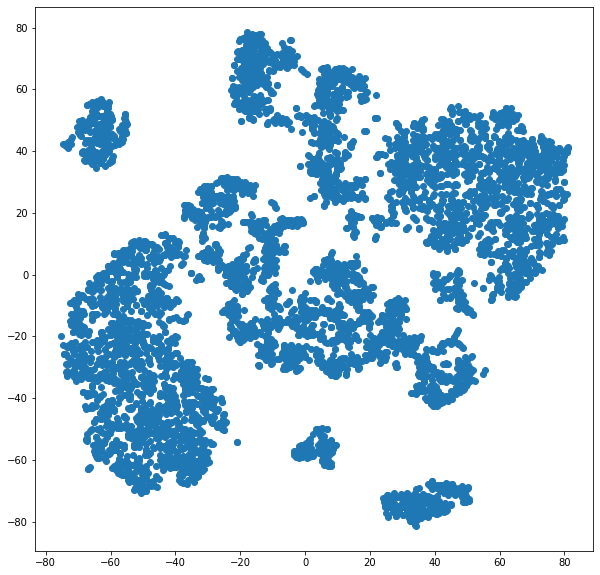

In [22]:
x_axis=model[:,0]
y_axis=model[:,1]

plt.figure(figsize = (10,10))
plt.scatter(x_axis, y_axis)
plt.show()

We see our t-SNE plot of our audio files, but it's not particularly interesting! Since we are dealing with audio files, there's no easy way to compare neighboring audio samples to each other. We can use some other, more interactive environment to view the results of the t-SNE. One way we can do this is by saving the results to a JSON file which stores the filepaths and t-SNE assignments of all the audio files. We can then load this JSON file in another environment.

In any case, to save the t-SNE to a JSON file, we first normalize the coordinates to between 0 and 1 and save them, along with the full filepaths.

In [23]:
from pyAudioProcessing import utils


tsne_path = "example-audio-tSNE.json"

x_norm = (x_axis - np.min(x_axis)) / (np.max(x_axis) - np.min(x_axis))
y_norm = (y_axis - np.min(y_axis)) / (np.max(y_axis) - np.min(y_axis))

data = [{"path":os.path.abspath(f), "point":[x, y]} for f, x, y in zip(sound_paths, x_norm, y_norm)]
# with open(tsne_path, 'w') as outfile:
utils.write_to_json(tsne_path, str(data))
    # json.dump(data, outfile, cls=)

print("saved %s to disk!" % tsne_path)


Results saved in example-audio-tSNE.json

saved example-audio-tSNE.json to disk!


In [63]:
km = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_km = km.fit_predict(model)
labels = km.labels_

In [64]:
model[y_km == 0, 0]

array([-62.235413, -61.026443, -68.931526, ..., -21.42581 , -44.370358,
       -31.887129], dtype=float32)

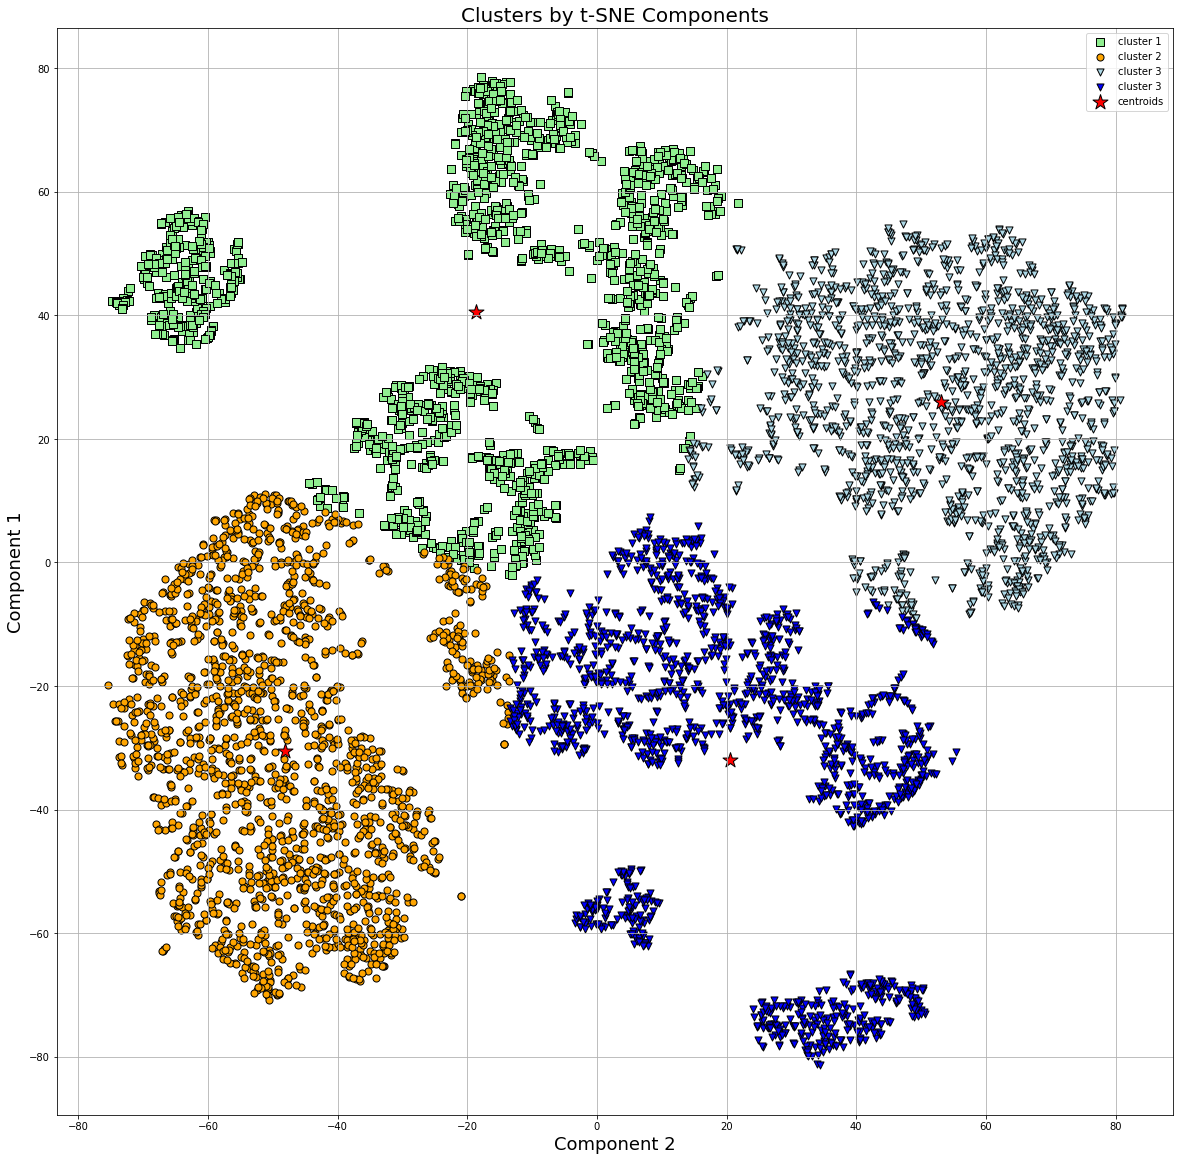

In [54]:
# plot the 3 clusters
plt.figure(figsize=(20, 20))
plt.scatter(
    model[y_km == 0, 0], model[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    model[y_km == 1, 0], model[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    model[y_km == 2, 0], model[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    model[y_km == 3, 0], model[y_km == 3, 1],
    s=50, c='blue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.title('Clusters by t-SNE Components (with Dimension Reduction)', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.grid()
plt.show()

In [110]:
kmeans_data_old = pd.read_csv('kmeans_results.csv')

#encoding class values
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('other', str(0))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('biophony', str(1))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('geophony', str(2))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('anthrophony', str(3))

y_km = kmeans_data_old['class']
y_km.drop(y_km.tail(1).index, inplace=True)
y_km = y_km.values
y_km

array(['3', '3', '3', ..., '0', '0', '0'], dtype=object)

[Text(0.5, 1.0, 'TSNE Plot with Ground Truth Overlayed'),
 Text(0, 0.5, 'TSNE Component 1'),
 Text(0.5, 0, 'TSNE Component 2')]

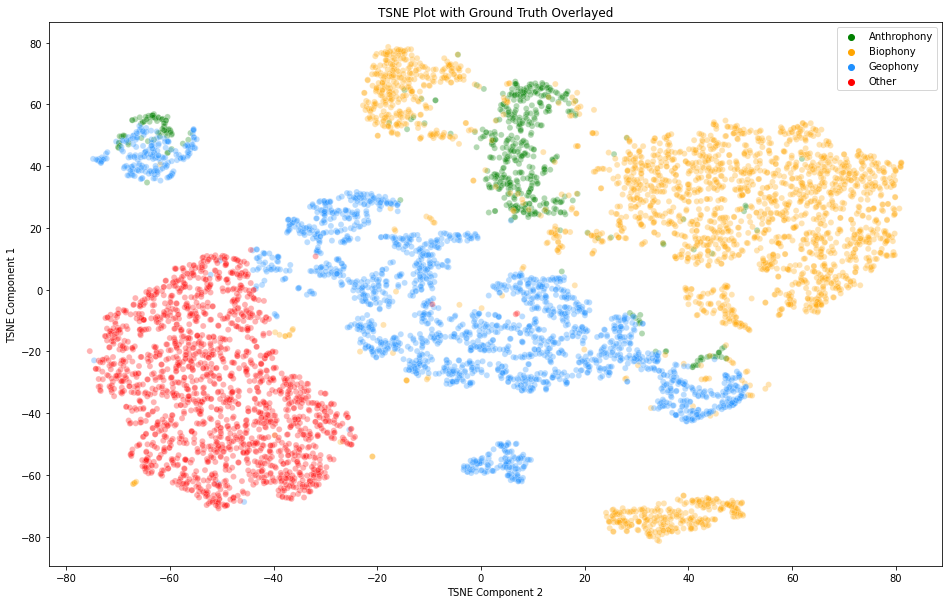

In [111]:
import seaborn as sns

x_axis=model[:,0]
y_axis=model[:,1]

plt.figure(figsize=(16,10))
ax=sns.scatterplot(
    x=x_axis, y=y_axis,
    hue=y_km,
    legend="full",
    alpha=0.3,
    palette=['green','orange','dodgerblue','red']
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Anthrophony', 'Biophony', 'Geophony', 'Other'])
ax.set(title="TSNE Plot with Ground Truth Overlayed", ylabel="TSNE Component 1", xlabel="TSNE Component 2")

TODO: GET STATISTICS FOR ALL OF THE ABOVE GRAPHS
TODO: CREATE ADDITIONAL GRAPH (USING SAME TSNE RESULTS) WITHOUT DIMENSION REDUCTION

In [112]:
kmeans_data_new = pd.read_csv('kmeans-nodr.csv', header='infer')
kmeans_data_new.drop(kmeans_data_new.tail(1).index,inplace=True) # drop last n rows

y_km = kmeans_data_new["Cluster"]

[Text(0.5, 1.0, 'Kmeans Clustering Results without Dimension Reduction'),
 Text(0, 0.5, 'TSNE Component 1'),
 Text(0.5, 0, 'TSNE Component 2')]

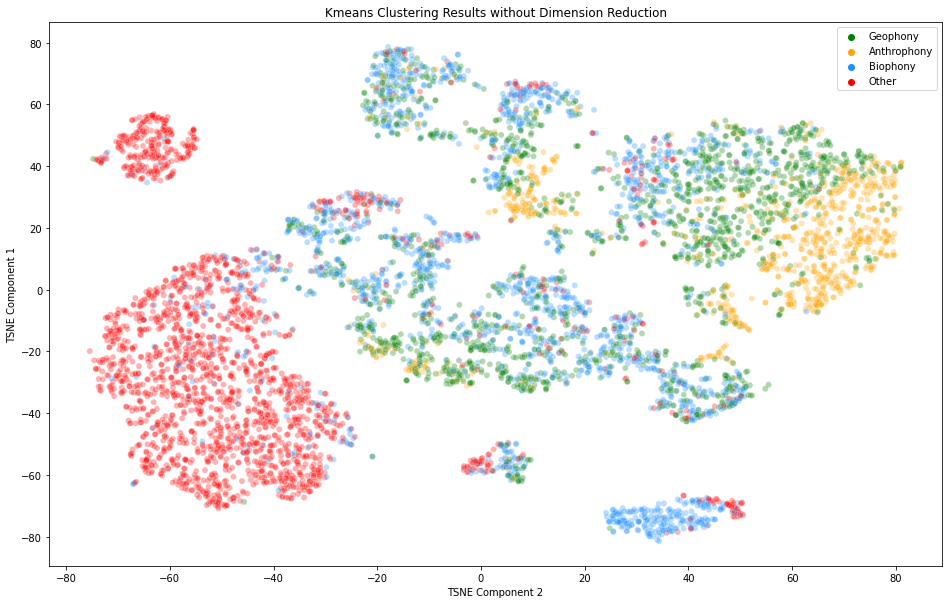

In [113]:
import seaborn as sns

x_axis=model[:,0]
y_axis=model[:,1]

plt.figure(figsize=(16,10))
ax=sns.scatterplot(
    x=x_axis, y=y_axis,
    hue=y_km,
    legend="full",
    alpha=0.3,
    palette=['green','orange','dodgerblue','red']
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Geophony', 'Anthrophony', 'Biophony', 'Other'])
ax.set(title="Kmeans Clustering Results without Dimension Reduction", ylabel="TSNE Component 1", xlabel="TSNE Component 2")

In [114]:
kmeans_data_old = pd.read_csv('kmeans_results.csv', header='infer')

kmeans_data_old.drop(kmeans_data_old.tail(1).index,inplace=True) # drop last n rows
y_km = kmeans_data_old["kmeans_class"]



[Text(0.5, 1.0, 'Kmeans Clustering Results with Dimension Reduction'),
 Text(0, 0.5, 'TSNE Component 1'),
 Text(0.5, 0, 'TSNE Component 2')]

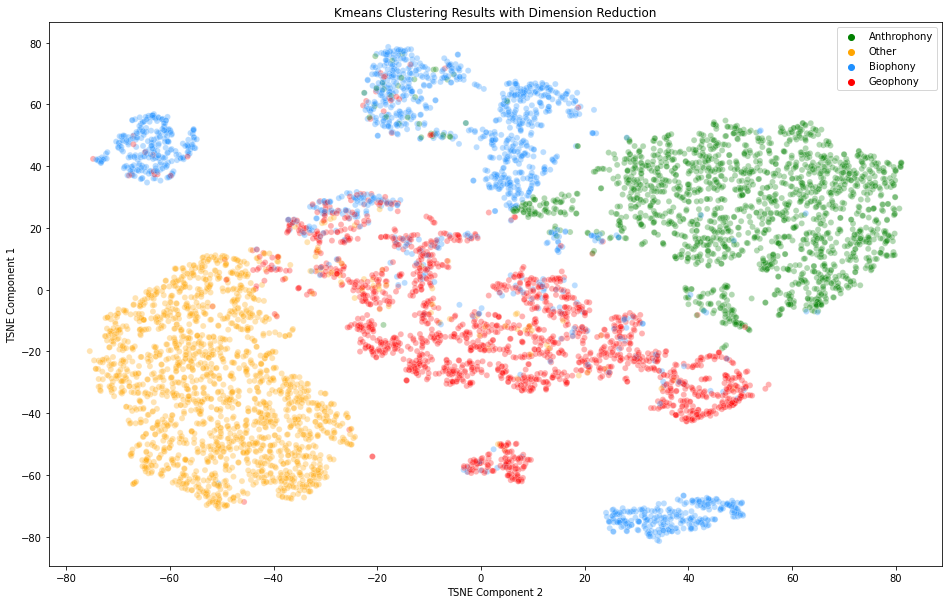

In [115]:
import seaborn as sns

x_axis=model[:,0]
y_axis=model[:,1]

plt.figure(figsize=(16,10))
ax=sns.scatterplot(
    x=x_axis, y=y_axis,
    hue=y_km,
    legend="full",
    alpha=0.3,
    palette=['green','orange','dodgerblue','red']
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Anthrophony', 'Other', 'Biophony', 'Geophony'])
ax.set(title="Kmeans Clustering Results with Dimension Reduction", ylabel="TSNE Component 1", xlabel="TSNE Component 2")

You will however be able to calculate statistics like within group variance and between group variance. The goal is to have low within group variance and high between group variance

In [ ]:
print(labels)

[2 2 2 ... 1 1 1]


TODO: append results to k-means and use metrics to evaluate results against ground truth data

In [ ]:
df = pd.read_csv('kmeans.csv')
print(df)


      zcr_mean  mfcc_1_mean  mfcc_2_mean  mfcc_3_mean  mfcc_4_mean  \
0     0.095967   -24.486922     2.616772     0.010015    -0.028701   
1     0.099092   -26.322015     2.503516    -0.133747    -0.050671   
2     0.057539   -23.958656     3.182271    -0.321015    -0.278128   
3     0.061880   -22.527360     3.179317    -0.245983    -0.170750   
4     0.059055   -22.848181     3.030284    -0.187596    -0.229274   
...        ...          ...          ...          ...          ...   
6599  0.195123   -22.319605     1.387810     0.390825     0.255591   
6600  0.216403   -22.306329     1.264834     0.280341     0.161782   
6601  0.210091   -22.148893     1.269364     0.261968     0.171584   
6602  0.196267   -22.182992     1.312101     0.275235     0.123335   
6603  0.190345   -22.694134     1.228849     0.273058     0.153615   

      mfcc_5_mean  mfcc_6_mean  mfcc_7_mean  mfcc_8_mean  mfcc_9_mean  \
0        0.324547     0.271122    -0.017142    -0.034534    -0.019369   
1        0.43

In [ ]:
kmeans_df = pd.DataFrame(labels, columns=["kmeans_class"])

df = pd.concat([df, kmeans_df], axis=1)
print(df)
df.to_csv("kmeans_results.csv", index=False)

      zcr_mean  mfcc_1_mean  mfcc_2_mean  mfcc_3_mean  mfcc_4_mean  \
0     0.095967   -24.486922     2.616772     0.010015    -0.028701   
1     0.099092   -26.322015     2.503516    -0.133747    -0.050671   
2     0.057539   -23.958656     3.182271    -0.321015    -0.278128   
3     0.061880   -22.527360     3.179317    -0.245983    -0.170750   
4     0.059055   -22.848181     3.030284    -0.187596    -0.229274   
...        ...          ...          ...          ...          ...   
6599  0.195123   -22.319605     1.387810     0.390825     0.255591   
6600  0.216403   -22.306329     1.264834     0.280341     0.161782   
6601  0.210091   -22.148893     1.269364     0.261968     0.171584   
6602  0.196267   -22.182992     1.312101     0.275235     0.123335   
6603  0.190345   -22.694134     1.228849     0.273058     0.153615   

      mfcc_5_mean  mfcc_6_mean  mfcc_7_mean  mfcc_8_mean  mfcc_9_mean  \
0        0.324547     0.271122    -0.017142    -0.034534    -0.019369   
1        0.43

Rand Index - similarity of the two clustering assignments
Biophony = 0
Other = 1
Anthrophony = 2
Geophony = 3

In [ ]:
#kmeans_df['kmeans_class'].value_counts()

1    1773
0    1715
3    1642
2    1474
Name: kmeans_class, dtype: int64

In [ ]:
from sklearn import metrics
kmeans_data = pd.read_csv('kmeans_results.csv', header='infer')

labels_pred = kmeans_data['kmeans_class']


#encoding class values
kmeans_data['class'] = kmeans_data['class'].str.replace('other', str(1))
kmeans_data['class'] = kmeans_data['class'].str.replace('biophony', str(0))
kmeans_data['class'] = kmeans_data['class'].str.replace('geophony', str(3))
kmeans_data['class'] = kmeans_data['class'].str.replace('anthrophony', str(2))

#print(kmeans_data)

labels_true = kmeans_data['class']

In [ ]:
metrics.rand_score(labels_true, labels_pred)

0.8499826584340782

The Rand index does not ensure to obtain a value close to 0.0 for a random labelling. The adjusted Rand index corrects for chance and will give such a baseline.

In [ ]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.6224338907761365

Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations. Two different normalized versions of this measure are available, Normalized Mutual Information (NMI) and Adjusted Mutual Information (AMI). NMI is often used in the literature, while AMI was proposed more recently and is normalized against chance:

In [ ]:
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

0.6422250679041911

homogeneity: each cluster contains only members of a single class.

completeness: all members of a given class are assigned to the same cluster.

In [ ]:
metrics.homogeneity_score(labels_true, labels_pred)

0.6682094500496919

In [ ]:
metrics.completeness_score(labels_true, labels_pred)

0.6185253607580806

Their harmonic mean called V-measure is computed by v_measure_score:

In [ ]:
metrics.v_measure_score(labels_true, labels_pred)

0.6424081911555413

The Fowlkes-Mallows score FMI is defined as the geometric mean of the pairwise precision and recall. A high value indicates a good similarity between two clusters

In [ ]:
metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.7268979874770117